# DAT210x - Programming with Python for DS

## Module5- Lab1

Many U.S. cities, the U.S. federal government, and even other cities and governments abroad have started subscribing to an Open Data policy, because some data should be transparent and available to everyone to use and republish freely, without restrictions from copyright, patents, or other mechanisms of control. After reading their terms of use, in this lab you'll be exploring the City of Chicago's Crime data set, which is part of their Open Data initiative.

Start by navigating over to the City of Chicago's Crimes dataset exploration page. It lists crimes from 2001 to the present, but you'll only be targeting Gambling. The city's website itself has hundreds of other datasets you can browse and do machine learning on.
Open up the /Module5/Module5 - Lab1.ipynb starter code, and follow the directions to acquire the dataset and properly set it up.
Fill out the doKMeans method to find and plot seven clusters and print out their centroids. These could be places a police officer investigates to check for on-going illegal activities.
Re-run your assignment a few times over, looking at your printed and plotted results. Then answer the following questions.
Note: If Pandas complains about your data, you can use dropna() on any row that has NANs in it.

Start by importing whatever you need to import in order to make this lab work:

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [21]:
df = pd.read_csv(r'Datasets/Crimes_-_2001_to_present.csv')
# df.head(3)
df.shape

(14273, 22)

Get rid of any _rows_ that have nans in them:

In [22]:
df = df.dropna(axis=0)
df.shape

(13060, 22)

In [23]:
df.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10014510,HY204159,03/30/2015 05:27:00 PM,064XX S EBERHART AVE,1661,GAMBLING,GAME/DICE,RESIDENTIAL YARD (FRONT/BACK),True,False,...,20.0,42.0,19,1180685.0,1862453.0,2015,08/17/2015 03:03:40 PM,41.777826,-87.613150,"(41.777825918, -87.613150208)"
1,10026594,HY216082,04/09/2015 06:09:00 PM,071XX S VINCENNES AVE,1661,GAMBLING,GAME/DICE,STREET,True,False,...,6.0,69.0,19,1176581.0,1857588.0,2015,08/17/2015 03:03:40 PM,41.764569,-87.628342,"(41.764569155, -87.628341654)"
2,10036303,HY225347,04/17/2015 11:18:00 AM,039XX W LEXINGTON ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,24.0,26.0,19,1150212.0,1896407.0,2015,08/17/2015 03:03:40 PM,41.871646,-87.723983,"(41.871646346, -87.723982869)"


Display the `dtypes` of your dset:

In [24]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [25]:
df['Date'] = pd.to_datetime(df.loc[:,'Date'])
df['Updated On'] = pd.to_datetime(df['Updated On'])

In [30]:
df[['Date', 'Updated On']].head(3)

,Date,Updated On
0,2015-03-30 17:27:00,2015-08-17 15:03:40
1,2015-04-09 18:09:00,2015-08-17 15:03:40
2,2015-04-17 11:18:00,2015-08-17 15:03:40


In [31]:
print(df[['Date', 'Updated On']].dtypes)

Date          datetime64[ns]
Updated On    datetime64[ns]
dtype: object


In [44]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)
 
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    # .. your code here ..
    df = df[['Longitude', 'Latitude']]

    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    # .. your code here ..
    model = KMeans(n_clusters=7)
    model.fit(df.values)
    
    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.70966112  41.87811296]
 [-87.61951638  41.8035787 ]
 [-87.58263382  41.75263295]
 [-87.66466244  41.77272629]
 [-87.75698152  41.89333363]
 [-87.63108338  41.69664745]
 [-87.68545162  41.98129611]]


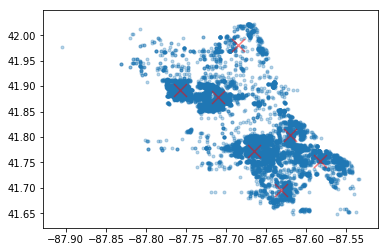

In [45]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [48]:
# .. your code here ..
df = df[df.Date > '2011-01-01']

[[-87.71064441  41.87553046]
 [-87.66500772  41.77570697]
 [-87.63457739  41.70588603]
 [-87.75479995  41.88997652]
 [-87.68726195  41.98359763]
 [-87.57984784  41.75070849]
 [-87.61923987  41.79182287]]


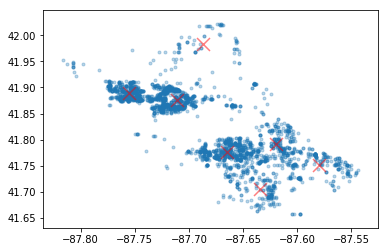

In [49]:
# Print & Plot your data
doKMeans(df)